<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 3 - Titanic</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png" width=50%>

## Importing the libraries

In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Load and Prepare Data

In [55]:
df = pd.read_csv(r'F:\jupyter\educational-\educational\csv\mansori\train2.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing

In [56]:
df.drop(columns=['Name','Ticket','Cabin'] , axis=0 ,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

df = df.set_index("PassengerId")
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2
889,0,3,0,NaN,1,2,23.4500,2


In [58]:
print(df.head(),3*'\n')
print(df.info(),3*'\n')
print(df.describe())

             Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                              
1                   0       3    1  22.0      1      0   7.2500         2
2                   1       1    0  38.0      1      0  71.2833         0
3                   1       3    0  26.0      0      0   7.9250         2
4                   1       1    0  35.0      1      0  53.1000         2
5                   0       3    1  35.0      0      0   8.0500         2 



<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null 

In [59]:
print(df.isnull().sum())


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64


In [60]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.dropna(inplace=True,axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6232\4108769458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


## EDA

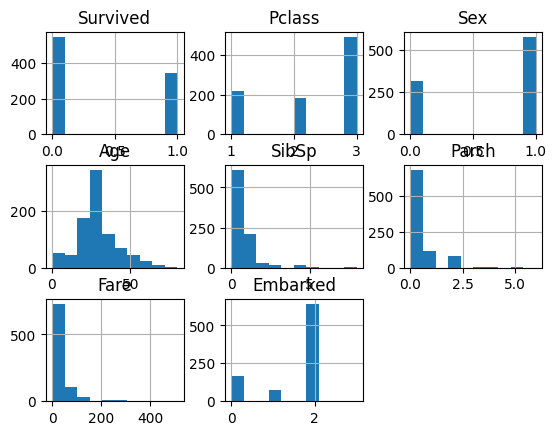

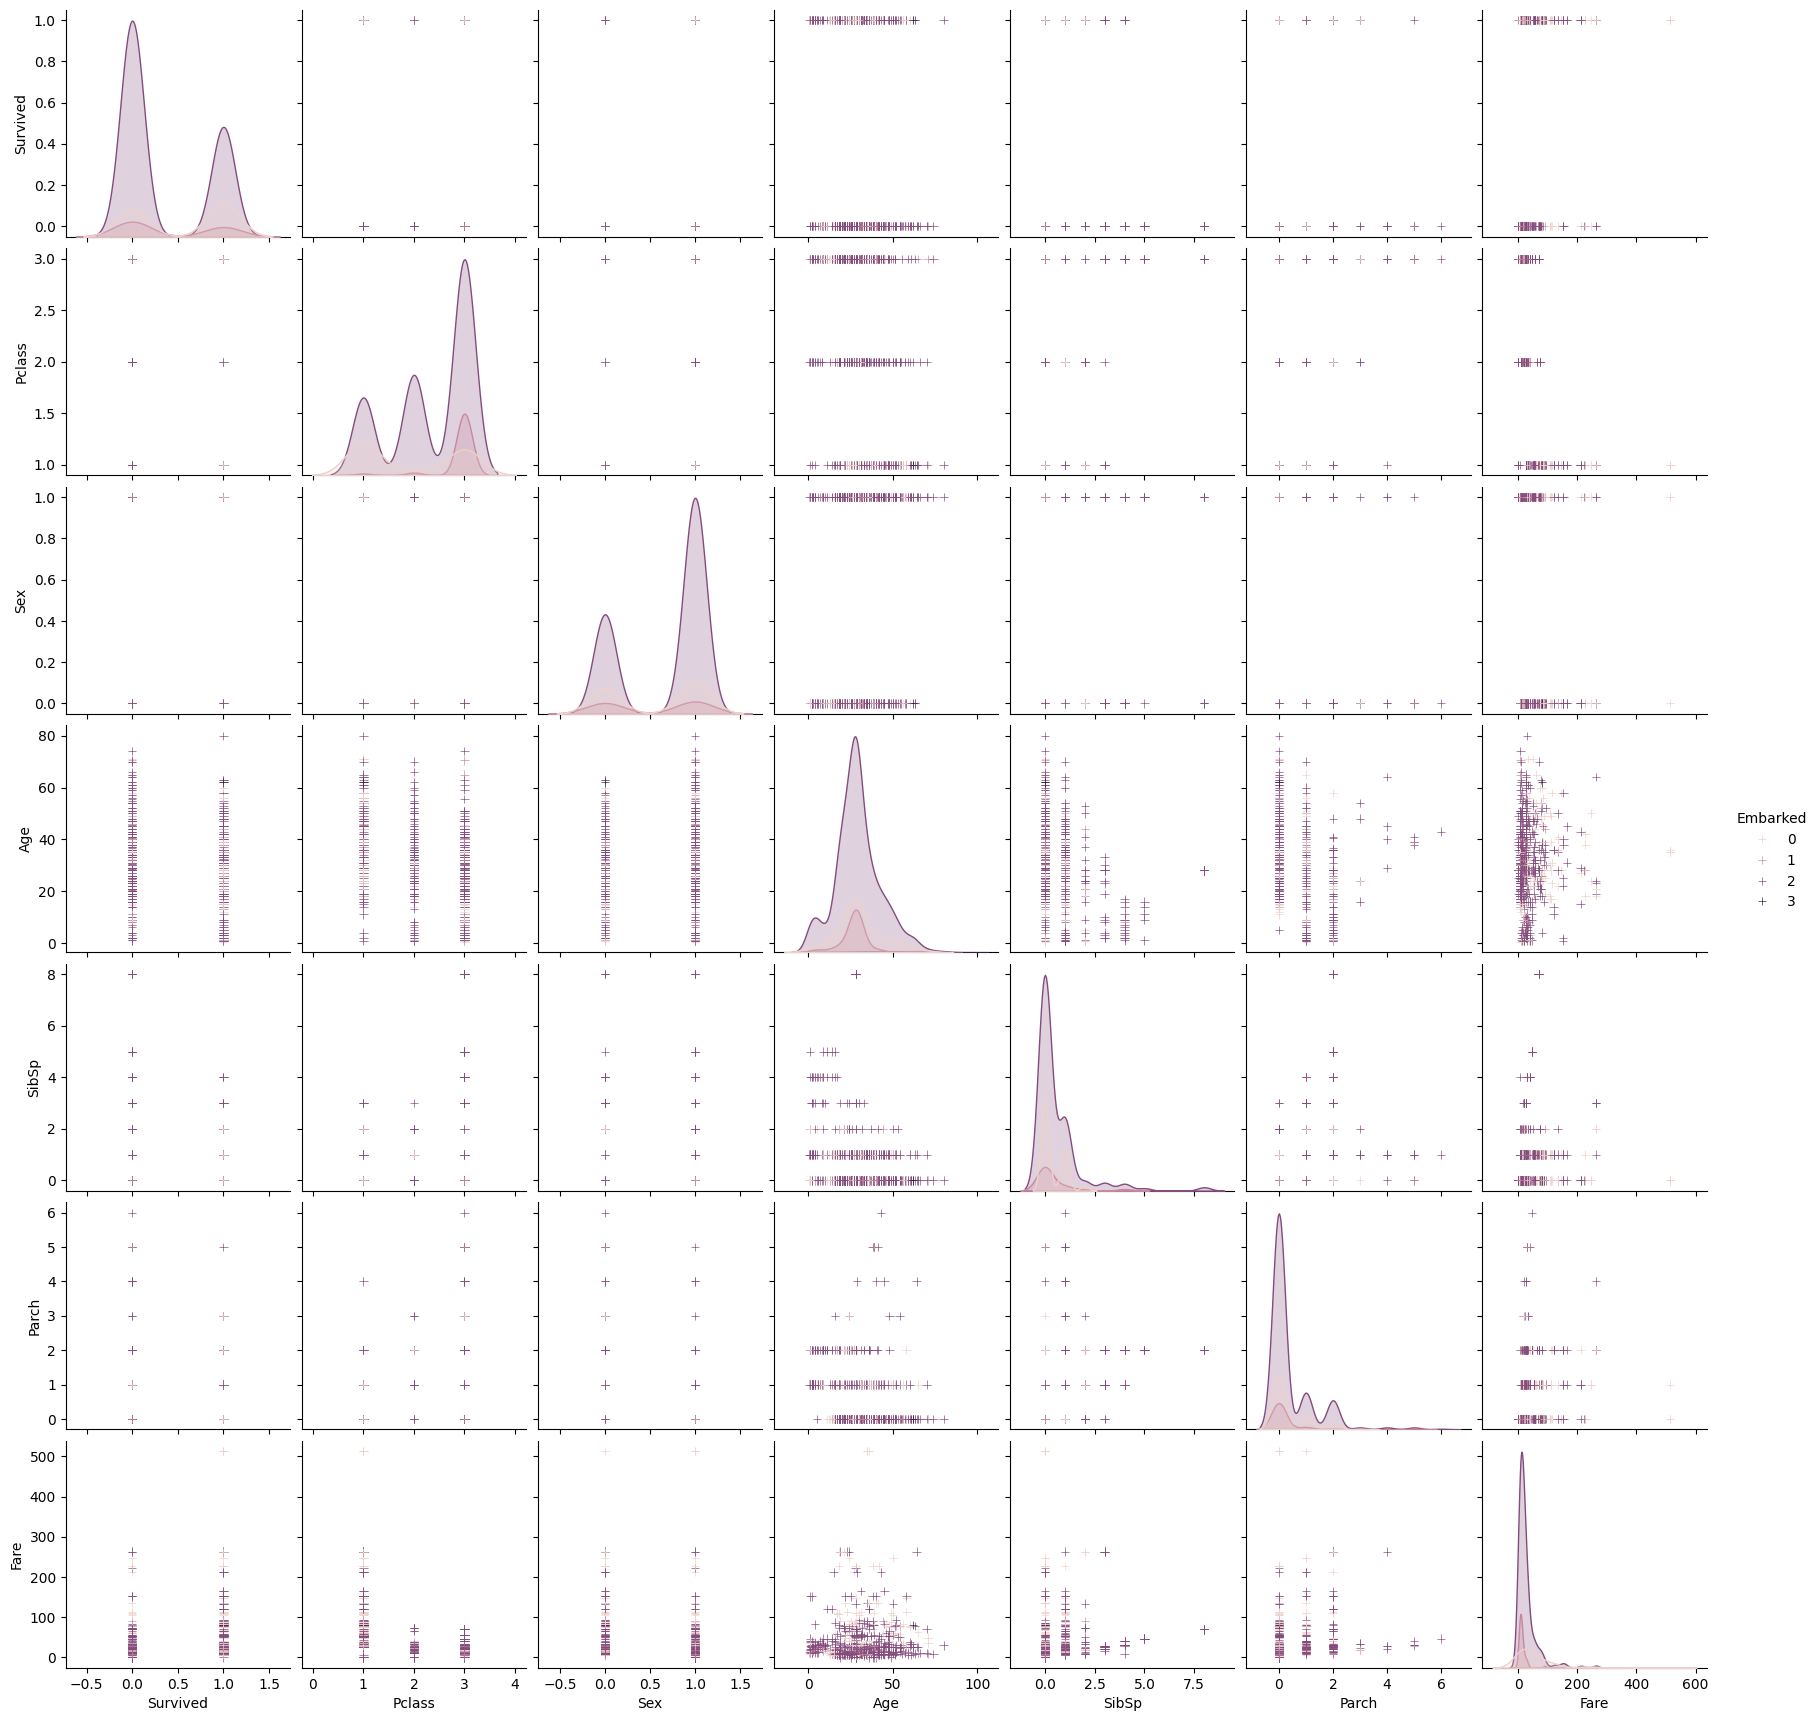

In [61]:
df.hist()
g = sns.pairplot(df, hue='Embarked', markers='+')
plt.show()

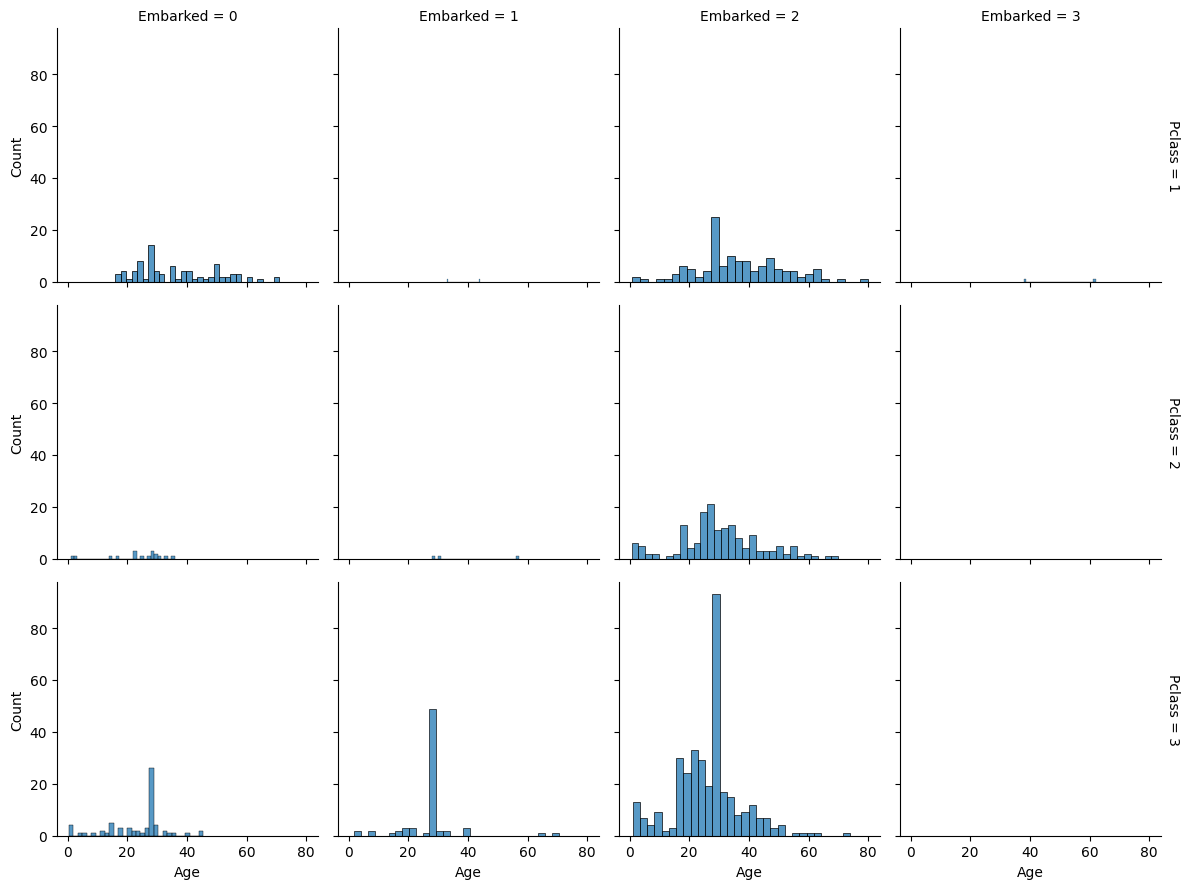

In [62]:
g = sns.FacetGrid(df, col='Embarked', row='Pclass', margin_titles=True)
g.map(sns.histplot, 'Age', bins=30)
plt.show()

Text(0.5, 1.0, 'Correlation ')

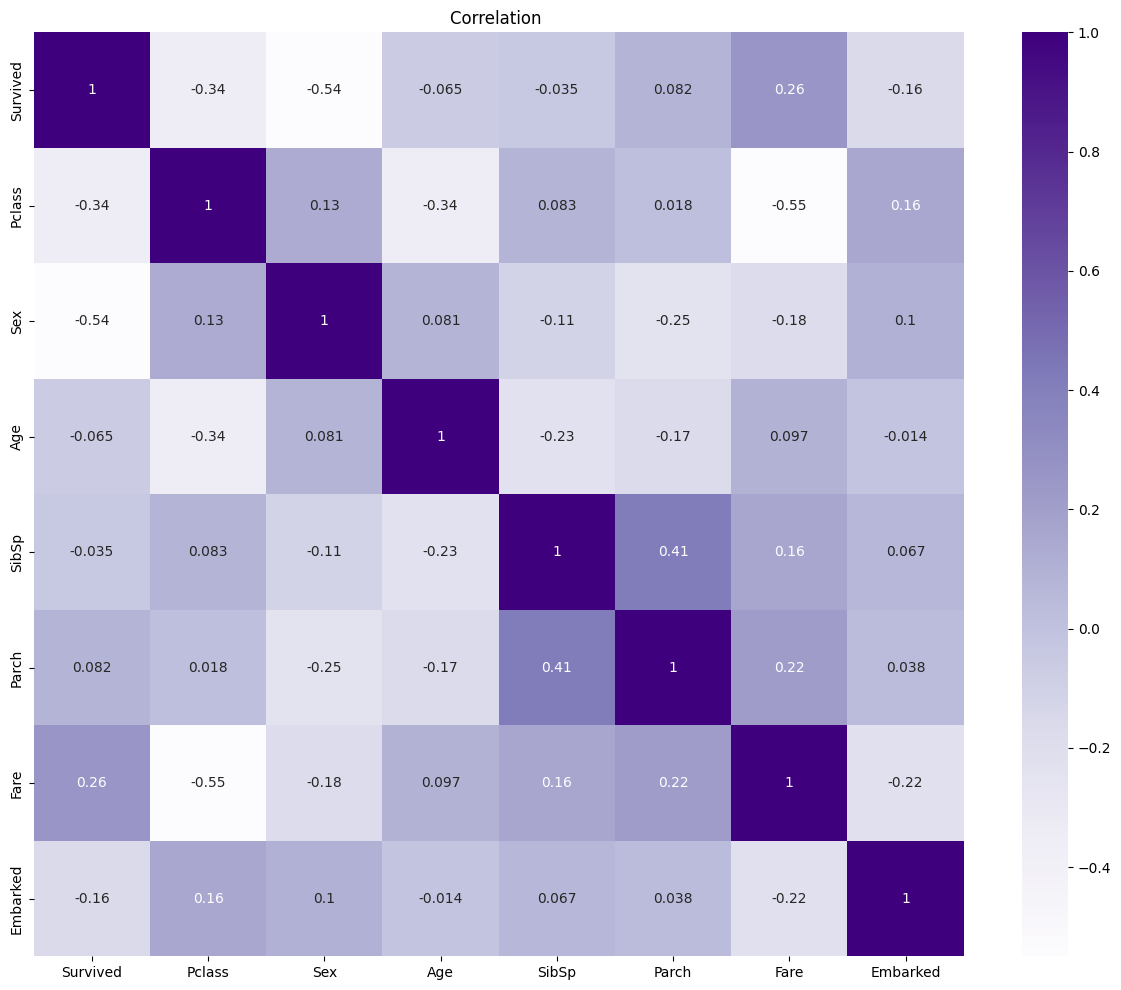

In [63]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples' , annot=True)
r.set_title("Correlation ")

In [64]:
df['Embarked'].value_counts()

Embarked
2    644
0    168
1     77
3      2
Name: count, dtype: int64

## Strorytelling - Visualization

In [65]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [66]:
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


In [67]:
model = XGBClassifier()
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0}


## Train your model (Classification)

In [68]:
best_model = XGBClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  84.91620111731844


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.48      0.57        29
           1       0.91      0.67      0.77        15
           2       0.86      0.95      0.90       135

    accuracy                           0.85       179
   macro avg       0.82      0.70      0.75       179
weighted avg       0.84      0.85      0.84       179



## Test Result

In [73]:
df_test=pd.read_csv(r'F:\jupyter\educational-\educational\csv\mansori\test2.csv')

df_test.drop(columns=['Name','Ticket','Cabin'] , axis=0 ,inplace=True)

label_encoder = LabelEncoder()
df_test['Sex'] = label_encoder.fit_transform(df_test['Sex'])
df_test['Embarked'] = label_encoder.fit_transform(df_test['Embarked'])

df_test = df_test.set_index("PassengerId")
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test.dropna(inplace=True,axis=1)

X = df_test.iloc[:,:-1].values
y = df_test.iloc[:,-1].values

from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

best_model = XGBClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)


y_pred_test = best_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_test) * 100

print("Accuracy of the Logistic Regression Model: ",accuracy)
print(classification_report(y_test, y_pred_test))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6232\2496476926.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].median(), inplace=True)


Accuracy of the Logistic Regression Model:  77.38095238095238
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        19
           1       1.00      0.22      0.36         9
           2       0.79      0.93      0.85        56

    accuracy                           0.77        84
   macro avg       0.83      0.58      0.61        84
weighted avg       0.79      0.77      0.75        84



## Send us the Result (Maktabkhoone)